In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip list

In [32]:
# df = pd.read_excel('dataset.xlsx')
df = pd.read_csv('dataset.csv')
df.head(5)

,word_id,sentence_id,word,label,is_ne,is_spelling_correct
0,45,1,Gusto,FIL,NaN,True
1,46,1,kong,FIL,NaN,True
2,47,1,intindihin,FIL,NaN,True
3,48,1,pero,FIL,NaN,True
4,49,1,hindi,FIL,NaN,True



Value counts:
label
FIL    17949
OTH     3281
ENG     1920
Name: count, dtype: int64

Percentage distribution:
label
FIL    77.533477
OTH    14.172786
ENG     8.293737
Name: proportion, dtype: float64


/var/folders/gh/8lb8pmm54lv62czj5v_yrmy00000gn/T/ipykernel_31854/3759091519.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


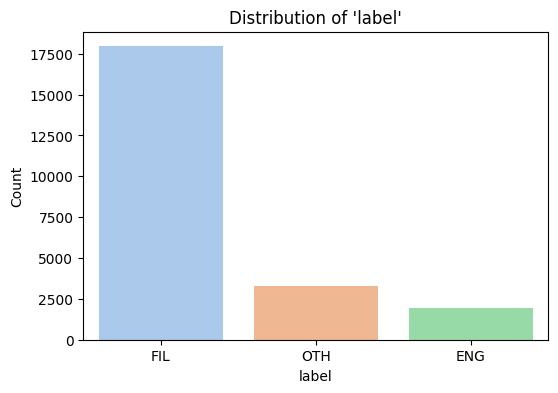

In [33]:
column = "label"

print("\nValue counts:")
print(df[column].value_counts())

print("\nPercentage distribution:")
print(df[column].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=column, palette="pastel")
plt.title(f"Distribution of '{column}'")
plt.xlabel(column)
plt.ylabel("Count")
plt.show()

In [18]:
df['label'] = df['label'].replace(['NUM', 'SYM'], 'OTH')


Value counts:
label
FIL    32312
ENG     4187
OTH     3641
UNK     1767
Name: count, dtype: int64

Percentage distribution:
label
FIL    77.104064
ENG     9.991171
OTH     8.688286
UNK     4.216479
Name: proportion, dtype: float64


/var/folders/gh/8lb8pmm54lv62czj5v_yrmy00000gn/T/ipykernel_31854/3759091519.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


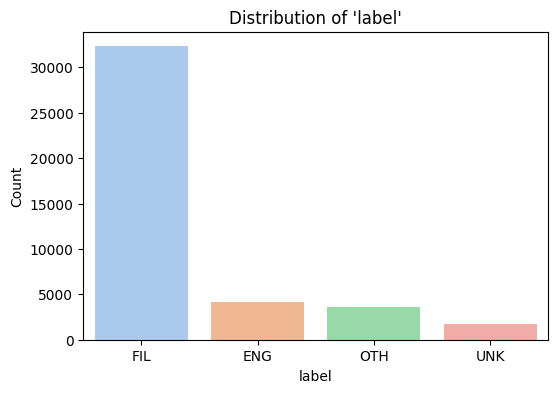

In [19]:
column = "label"

print("\nValue counts:")
print(df[column].value_counts())

print("\nPercentage distribution:")
print(df[column].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=column, palette="pastel")
plt.title(f"Distribution of '{column}'")
plt.xlabel(column)
plt.ylabel("Count")
plt.show()

In [17]:
df_unk= df[df['label'] == 'UNK']

df_unk.head()

,word_id,sentence_id,sentence,context,word,label,special_tags,is_correct,corrected_label,corrected_special_tags,is_dirty,notes
32,33,0,Matapos ang matagumpay na mga konsultasyon kas...,GAB Chairman Abraham Kahlil Mitra,Abraham,UNK,NE,NaN,NaN,NaN,NaN,NaN
33,34,0,Matapos ang matagumpay na mga konsultasyon kas...,"Chairman Abraham Kahlil Mitra ,",Kahlil,UNK,NE,NaN,NaN,NaN,NaN,NaN
34,35,0,Matapos ang matagumpay na mga konsultasyon kas...,"Abraham Kahlil Mitra , at",Mitra,UNK,NE,NaN,NaN,NaN,NaN,NaN
38,39,0,Matapos ang matagumpay na mga konsultasyon kas...,at Commissioners Ed Trinidad at,Ed,UNK,NE,NaN,NaN,NaN,NaN,NaN
39,40,0,Matapos ang matagumpay na mga konsultasyon kas...,Commissioners Ed Trinidad at Mar,Trinidad,UNK,NE,NaN,NaN,NaN,NaN,NaN


In [ ]:
## feature for vowel and consonant ratio

def vowel_consonant_ratio(word):
    if not isinstance(word, str):  ### if the word does not have alphabet
        return 0.0
    
    vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']
    num_vowels = sum(1 for ch in word if ch.isalpha() and ch in vowels)
    num_consonants = sum(1 for ch in word)

    if num_consonants == 0:
        return 1.0 if num_vowels > 0 else 0.0
    return num_vowels / num_consonants

def vowel_word_ratio(word):
    if not isinstance(word, str):
        return 0.0
    
    vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']
    num_vowels = sum(1 for ch in word if ch.isalpha() and ch in vowels)
    num_consonants = sum(1 for ch in word)

    if num_consonants == 0:
        return 1.0 if num_vowels > 0 else 0.0
    return num_vowels / num_consonants

df['vowel_word_ratio'] = df['word'].apply(vowel_word_ratio)

df.head()

,word_id,sentence_id,sentence,context,word,label,special_tags,is_correct,corrected_label,corrected_special_tags,is_dirty,notes,vowel_consonant_ratio,vowel_word_ratio
0,1,0,Matapos ang matagumpay na mga konsultasyon kas...,Matapos ang matagumpay,Matapos,FIL,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.428571
1,2,0,Matapos ang matagumpay na mga konsultasyon kas...,Matapos ang matagumpay na,ang,FIL,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333
2,3,0,Matapos ang matagumpay na mga konsultasyon kas...,Matapos ang matagumpay na mga,matagumpay,FIL,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.400000
3,4,0,Matapos ang matagumpay na mga konsultasyon kas...,ang matagumpay na mga konsultasyon,na,FIL,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.500000
4,5,0,Matapos ang matagumpay na mga konsultasyon kas...,matagumpay na mga konsultasyon kasama,mga,FIL,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333


In [29]:
## Word length

df['word_length'] = df['word'].apply(lambda w: len(str(w)) if isinstance(w, str) else 0)

In [31]:
import re
from sklearn.feature_extraction.text import CountVectorizer

def clean_word(word):
    if not isinstance(word, str):
        return "" 
    return re.sub(r'[^a-z]', '', word.lower())

df['clean_word'] = df['word'].apply(clean_word)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
X = vectorizer.fit_transform(df['clean_word'])
ngrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_ngrams = pd.concat([df, ngrams_df], axis=1)

print(df_ngrams.head())


   word_id  sentence_id                                           sentence  \
0        1            0  Matapos ang matagumpay na mga konsultasyon kas...   
1        2            0  Matapos ang matagumpay na mga konsultasyon kas...   
2        3            0  Matapos ang matagumpay na mga konsultasyon kas...   
3        4            0  Matapos ang matagumpay na mga konsultasyon kas...   
4        5            0  Matapos ang matagumpay na mga konsultasyon kas...   

                                 context        word label special_tags  \
0                 Matapos ang matagumpay     Matapos   FIL          NaN   
1              Matapos ang matagumpay na         ang   FIL          NaN   
2          Matapos ang matagumpay na mga  matagumpay   FIL          NaN   
3     ang matagumpay na mga konsultasyon          na   FIL          NaN   
4  matagumpay na mga konsultasyon kasama         mga   FIL          NaN   

   is_correct  corrected_label  corrected_special_tags  ...  zr  zri  zu  zue  \